In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("data.csv", parse_dates=True, index_col='_time')
data=data.sort_index(ascending=True) 
data.head()

,value
_time,
2021-01-21 08:00:00,31.393
2021-01-21 08:01:00,31.827
2021-01-21 08:02:00,29.186
2021-01-21 08:03:00,29.460
2021-01-21 08:04:00,32.143


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18631 entries, 2021-01-21 08:00:00 to 2021-02-20 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   18631 non-null  float64
dtypes: float64(1)
memory usage: 291.1 KB


In [40]:
data.isnull()

,value
_time,
2021-01-21 08:00:00,False
2021-01-21 08:01:00,False
2021-01-21 08:02:00,False
2021-01-21 08:03:00,False
2021-01-21 08:04:00,False
...,...
2021-02-20 17:56:00,False
2021-02-20 17:57:00,False
2021-02-20 17:58:00,False


array([<Axes: xlabel='_time'>], dtype=object)

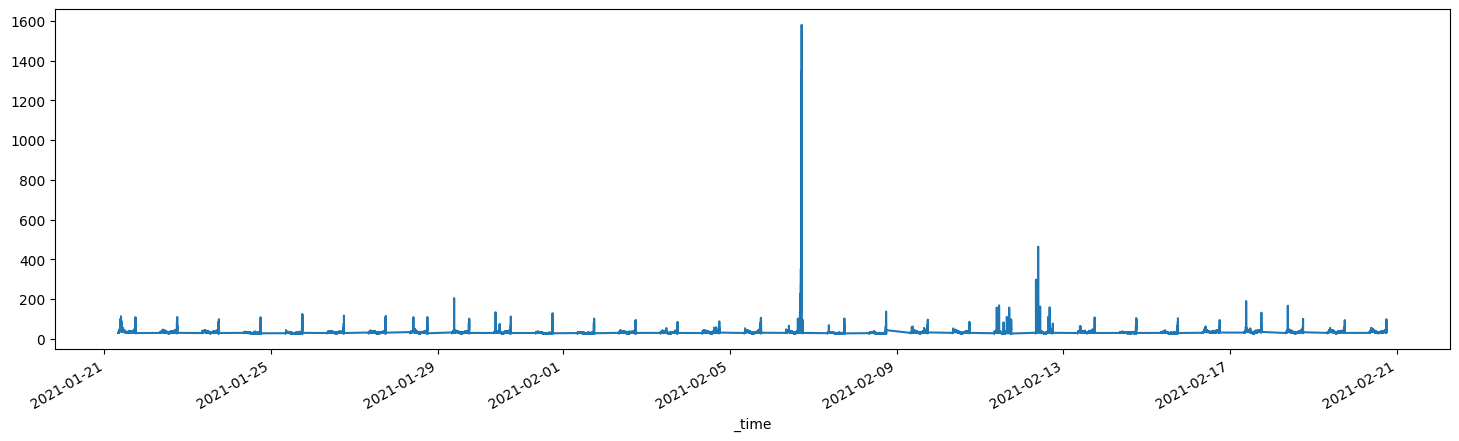

In [41]:
data['value'].plot(subplots=True, figsize=(18,5))

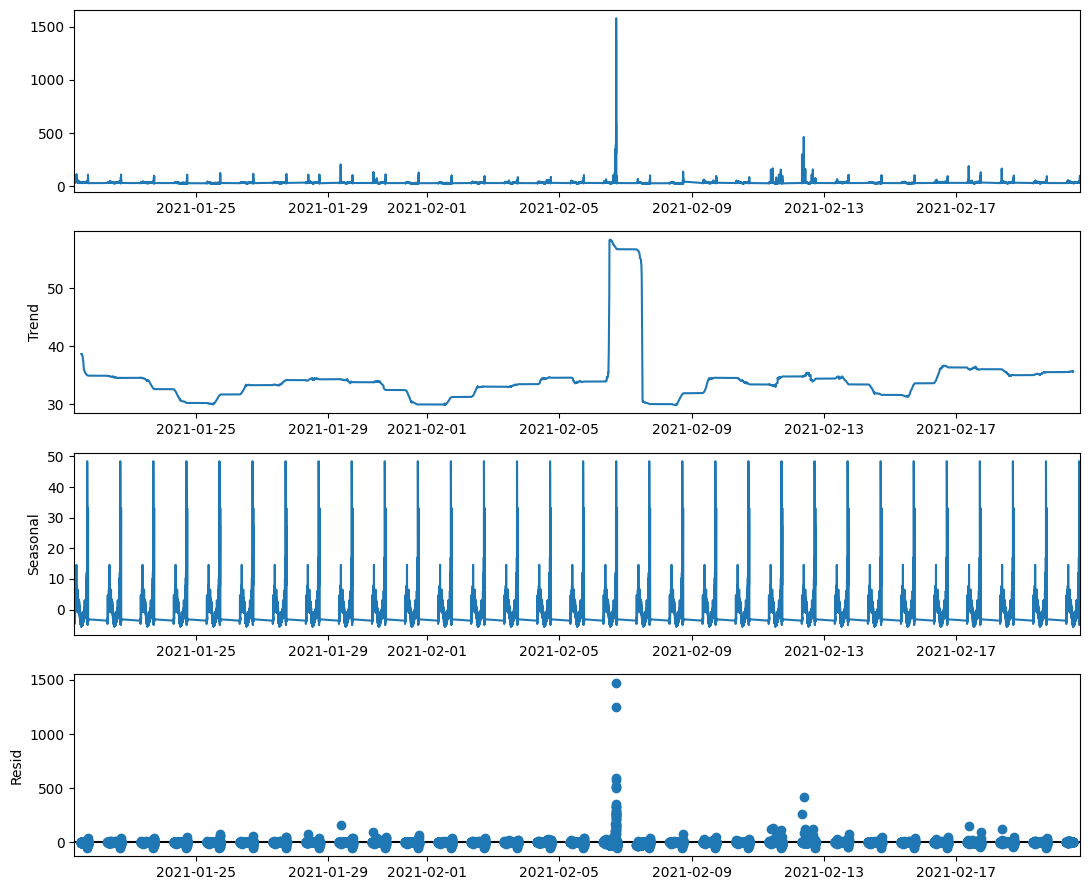

In [51]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(data, model='Additive',period=601)
fig = decomposition.plot()
plt.show()

(31, 1)


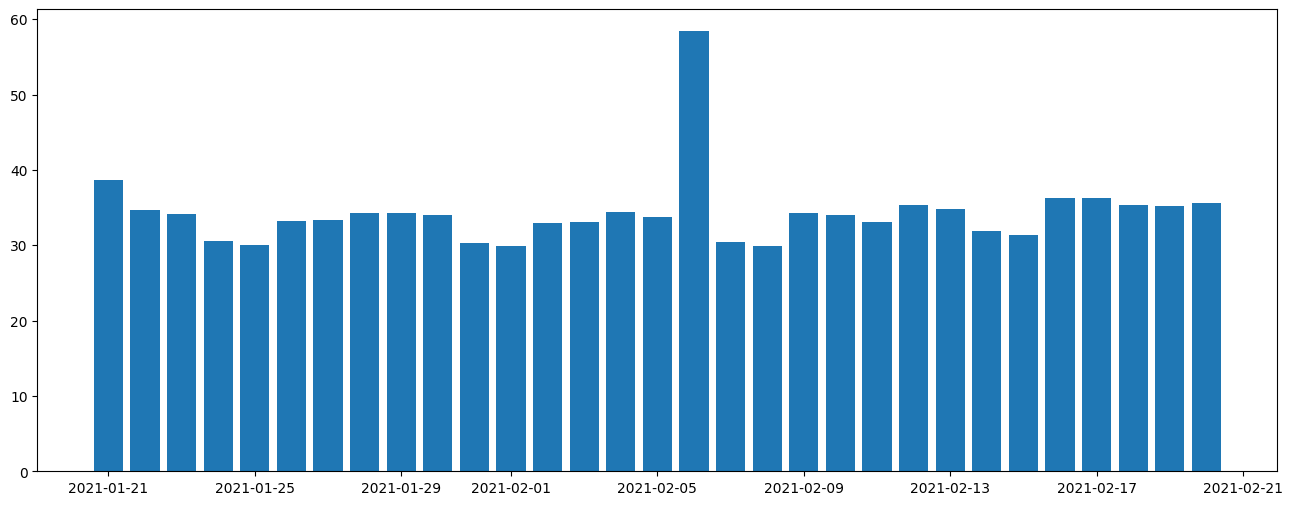

In [54]:
data_day=data.resample('1D').mean()
fig, ax = plt.subplots(figsize=(16, 6))

ax.bar(data_day.index, data_day["value"], width=0.8, align='center')
print(data_day.shape)

In [79]:
data_under_=data[data.values<2000]
data_under_.head()
data_under_.shape

(18631, 1)

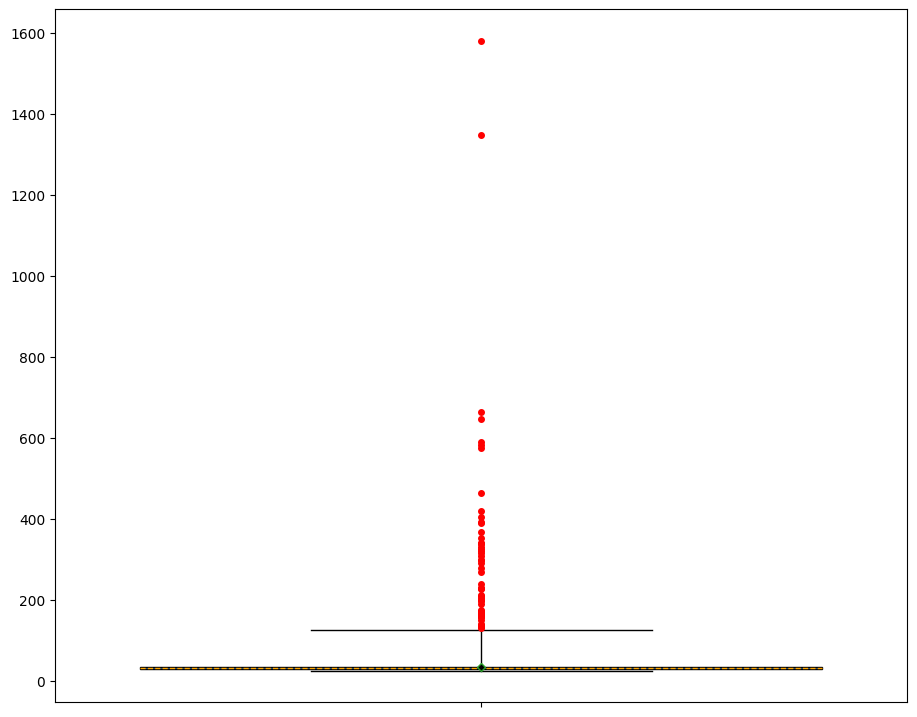

In [82]:
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
# 绘制箱线图（1.5倍的四分位差，如需绘制3倍的四分位差，只需调整whis参数）
plt.boxplot(x = data_under_.values, # 指定绘制箱线图的数据
         whis = 18,#1.5,#1.5, # 指定1.5倍的四分位差
         widths =0.8, # 指定箱线图的宽度为0.8
         patch_artist = True, # 指定需要填充箱体颜色
         showmeans = True, # 指定需要显示均值
         boxprops = {'facecolor':'steelblue'}, # 指定箱体的填充色为铁蓝色
        # 指定异常点的填充色、边框色和大小
         flierprops = {'markerfacecolor':'red', 'markeredgecolor':'red', 'markersize':4}, 
         # 指定均值点的标记符号（菱形）、填充色和大小
        meanprops = {'marker':'D','markerfacecolor':'black', 'markersize':4}, 
         medianprops = {'linestyle':'--','color':'orange'}, # 指定中位数的标记符号（虚线）和颜色
         labels = [''] # 去除箱线图的x轴刻度值
         )
# 显示图形
plt.show()

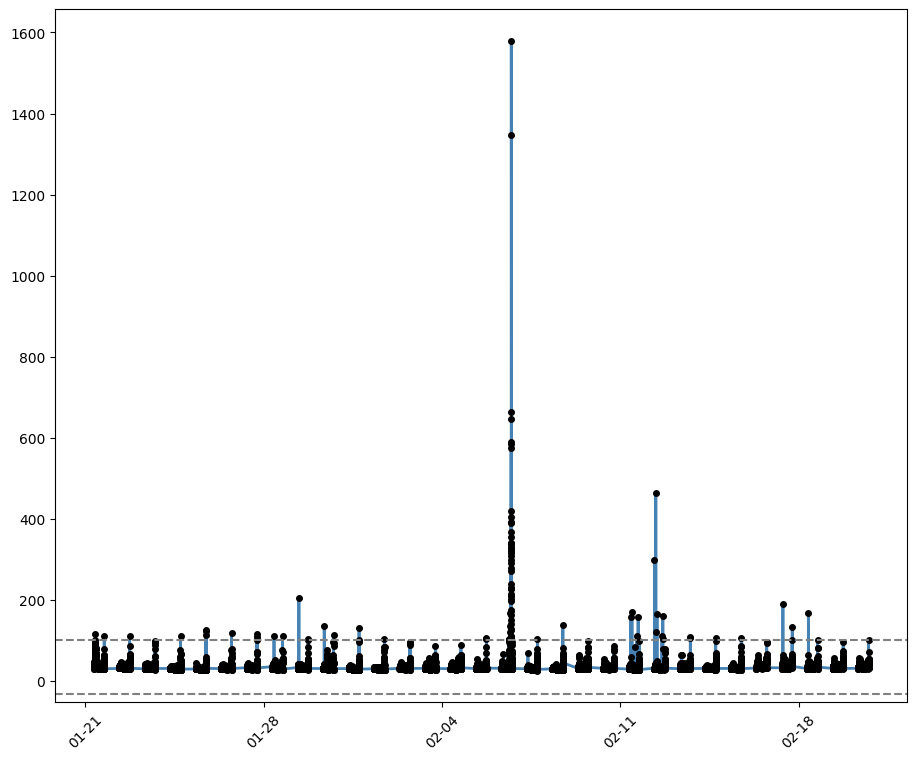

In [85]:
# 绘制单条折线图，并在折线图的基础上添加点图
plt.plot(data.index, # x轴数据
      data.values, # y轴数据
      linestyle = '-', # 设置折线类型
      linewidth = 2, # 设置线条宽度
      color = 'steelblue', # 设置折线颜色
      marker = 'o', # 往折线图中添加圆点
      markersize = 4, # 设置点的大小
      markeredgecolor='black', # 设置点的边框色
      markerfacecolor='black') # 设置点的填充色


# 添加上下界的水平参考线（便于判断异常点，如下判断极端异常点，只需将2改为3）
plt.axhline(y = data.values.mean() - 3* data.values.std(), linestyle = '--', color = 'gray')
plt.axhline(y = data.values.mean() + 3* data.values.std(), linestyle = '--', color = 'gray')

# 导入模块，用于日期刻度的修改（因为默认格式下的日期刻度标签并不是很友好）
import matplotlib as mpl
# 获取图的坐标信息
ax = plt.gca()
# 设置日期的显示格式  
date_format = mpl.dates.DateFormatter("%m-%d")  
ax.xaxis.set_major_formatter(date_format) 

# 设置x轴每个刻度的间隔天数
xlocator = mpl.ticker.MultipleLocator(7)
ax.xaxis.set_major_locator(xlocator)
# 为了避免x轴刻度标签的紧凑，将刻度标签旋转45度
plt.xticks(rotation=45)
# 显示图形
plt.show()